In [ ]:
# https://adventofcode.com/2018/day/18

data = hcat(open("18.txt", "r") do file
    readlines(file) .|> collect .|> x -> convert.(Int, x)
end...)'

const OPEN, WOOD, YARD = convert.(Int, collect(".|#"))


In [ ]:
# single round simulation

function simulate(grid)
    prev = grid
    grid = copy(grid)
    for i in 1:size(grid, 1), j in 1:size(grid, 2)
        neighbors = [prev[x, y]
                     for x in i - 1:i + 1, y in j - 1:j + 1
                     if x in 1:size(grid, 1) && y in 1:size(grid, 2) 
                        && (x, y) != (i, j)]
        if grid[i, j] == OPEN
            if sum(neighbors .== WOOD) >= 3
                grid[i, j] = WOOD
            end
        elseif grid[i, j] == WOOD
            if sum(neighbors .== YARD) >= 3
                grid[i, j] = YARD
            end
        elseif grid[i, j] == YARD
            if YARD ∉ neighbors || WOOD ∉ neighbors
                grid[i, j] = OPEN
            end
        end
    end
    return grid
end


In [3]:
# part 1

grid = copy(data)
for round in 1:10
    grid = simulate(grid)
end

sum(grid .== WOOD) * sum(grid .== YARD)


506385

In [4]:
# part 2, simulation

# run the simulation for 1000 iterations
# the resource value becomes periodic after 700 rounds or so
grid = copy(data)
curve = []
for round in 1:1000
    grid = simulate(grid)
    push!(curve, sum(grid .== WOOD) * sum(grid .== YARD))
end


In [43]:
# part 2, analysis

import FFTW

const OFFSET = 700   # starting guess of periodicity
const WINDOW = 256   # FFT window size

# remove any DC offset and window the signal
signal = curve[2:end] - curve[1:end - 1] .* 1.0
signal = signal[OFFSET:OFFSET + WINDOW - 1]

# compute the magnitude fourier transform
fft = signal |> FFTW.rfft .|> abs

# find the maximum amplitude frequency, which is our periodicity
# this should technically be the first local maximum, but it turns
# out that the first maximum is also the global maximum in the solution
freq = round(Int, WINDOW / (argmax(fft) - 1))


28

In [34]:
# part 2, solution

# we now have the frequency of the periodic resource value, 
# so we can project it out to any number of rounds via modulus
const ROUNDS = 1000000000

curve[OFFSET + (ROUNDS - OFFSET) % freq]


215404

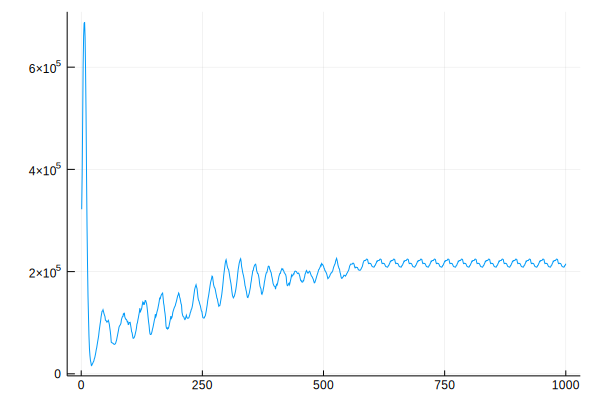

In [11]:
# visualization

import Plots

# this shows approximately when the resource value becomes periodic
Plots.plot(curve, legend=false)


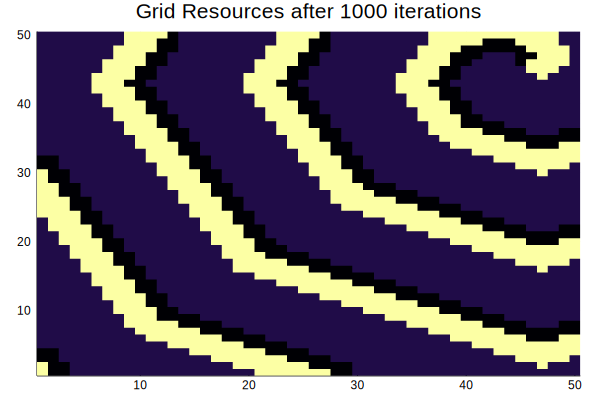

In [29]:
Plots.heatmap(1:size(grid, 1), 
              1:size(grid, 2),
              grid,
              legend=false,
              title="Grid Resources after 1000 iterations")


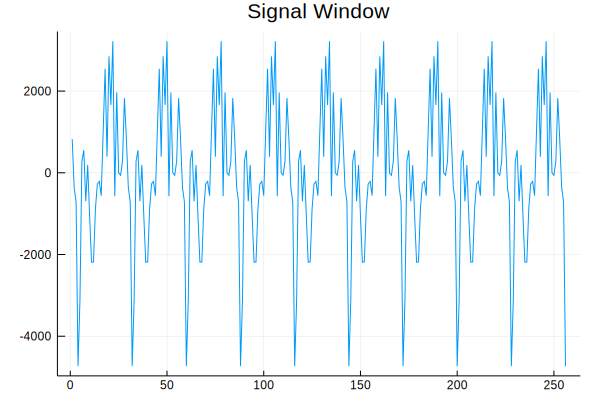

In [30]:
Plots.plot(signal, legend=false, title="Signal Window")


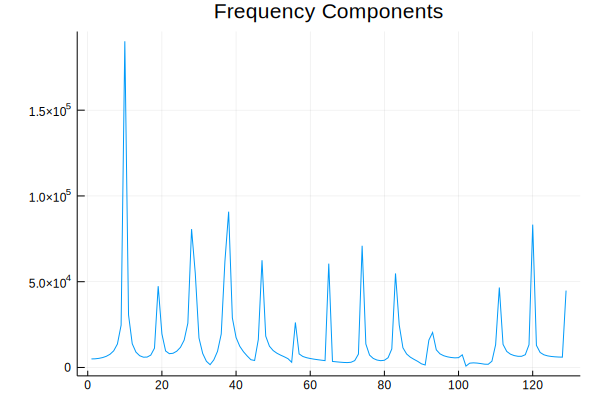

In [32]:
Plots.plot(fft, legend=false, title="Signal Frequency Components")
